In [1]:
% run audio_utils.ipynb
% run model.ipynb
import tensorflow as tf
import os
from IPython.display import Audio, display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/durveshvedak/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
content_filename = "content.wav"
style_filename = "style.wav"

In [3]:
display(Audio(content_filename))
display(Audio(style_filename))

In [4]:
# creating object of AudioUtils class and getting 2-D sprectrogram from raw audio
audio_utils = AudioUtils()
a_content, sampling_rate = audio_utils.wave_to_spectrogram(content_filename,2048)
a_style, sampling_rate = audio_utils.wave_to_spectrogram(style_filename,2048)

In [5]:
n_samples = a_content.shape[1] # considering time domain as samples
n_channels = a_content.shape[0] # considering frequency domain as channels
a_style = a_style[:n_channels, :n_samples] # making sure style and content tensors have same shape

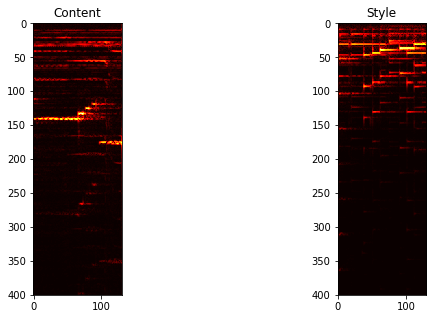

In [6]:
#plotting style and content spectrogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Content')
plt.imshow(a_content[:400,:],cmap='hot')
plt.subplot(1, 2, 2)
plt.title('Style')
plt.imshow(a_style[:400,:],cmap='hot')
plt.show()

In [7]:
#object for model class
m = Model(n_samples,n_channels,4096,a_content,a_style, 0.01,10000)

In [8]:
#getting style and content features
content_features, style_features = m.get_features()

In [9]:
# getting gram matrix of style features
style_gram = m.get_style_gram_matrix(style_features)

In [10]:
# optimizing method to update random noise
result = m.optimize(content_features, style_gram)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Started optimization.
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 79.748222
  Number of iterations: 852
  Number of functions evaluations: 881
Final loss: 79.74822


In [11]:
# phase reconstruction
a = np.zeros_like(a_content)
a[:n_channels,:] = np.exp(result[0,0].T) - 1

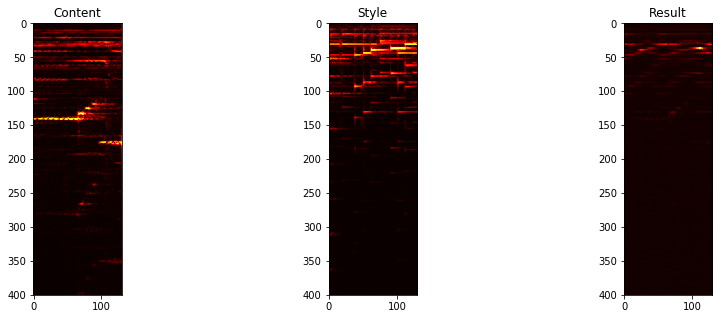

In [12]:
#plotting content style and output spectrogram to compare result
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Content')
plt.imshow(a_content[:400,:],cmap='hot')
plt.subplot(1,3,2)
plt.title('Style')
plt.imshow(a_style[:400,:],cmap='hot')
plt.subplot(1,3,3)
plt.title('Result')
plt.imshow(a[:400,:],cmap='hot')
plt.show()

In [13]:
AudioUtils().spectrogram_to_wave(a , 2048 , "out.wav", sampling_rate)

In [14]:
display(Audio("out.wav"))